# Principal Components Analysis

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline  

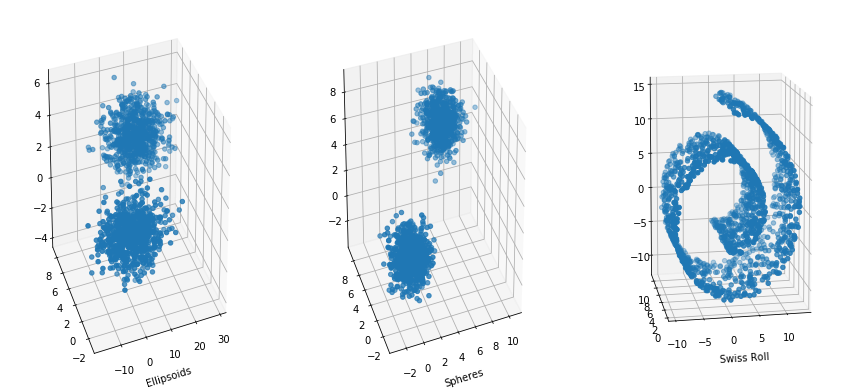

In [2]:
#Load data, subtract mean, etc
ellipse     = pd.read_table('ellipsoids.txt',delim_whitespace=True,header=None)
sphere     = pd.read_table('spheres.txt', delim_whitespace = True, header=None)
swiss_roll  = pd.read_table('swissroll.txt',delim_whitespace=True, header=None)
X_ellipse   = ellipse.iloc[:,0:].values
X_sphere  = sphere.iloc[:,0:].values
X_swiss_roll= swiss_roll.iloc[:,0:].values
sc      = StandardScaler()
fig = plt.figure()
ax1 = fig.add_subplot(2,3,1, projection='3d')
ax2 = fig.add_subplot(2,3,2, projection='3d')
ax3 = fig.add_subplot(2,3,3, projection='3d')
ax1.scatter(X_ellipse[:,0], X_ellipse[:,1], X_ellipse[:,2],zdir="-z")
ax2.scatter(X_sphere[:,0], X_sphere[:,1], X_sphere[:,2],zdir='-z')
ax3.scatter(X_swiss_roll[:,0], X_swiss_roll[:,1], X_swiss_roll[:,2],zdir='-z')
ax1.set_xlabel('Ellipsoids')
ax2.set_xlabel('Spheres')
ax3.set_xlabel('Swiss Roll')
ax1.view_init(30,-110)
ax2.view_init(30,-110)
ax3.view_init(10,-100)
fig = plt.gcf()
fig.set_size_inches(15, 15)
X_train_std_ellipse = sc.fit_transform(X_ellipse)
X_train_std_sphere = sc.fit_transform(X_sphere)
X_train_std_swissroll = sc.fit_transform(X_swiss_roll)

In [3]:
#compute covariance, eigenvals and eigenvecs
cov_mat_ellipse = np.cov(X_train_std_ellipse.T)
cov_mat_sphere = np.cov(X_train_std_sphere.T)
cov_mat_swissroll = np.cov(X_train_std_swissroll.T)

print("Ellipsoids Covariance matrix = ")
print(cov_mat_ellipse)

print("\nSpheres Covariance matrix = ")
print(cov_mat_sphere)

print("\nSwiss Roll Covariance matrix = ")
print(cov_mat_swissroll)

eigen_vals_ellipse, eigen_vecs_ellipse = np.linalg.eig(cov_mat_ellipse)
eigen_vals_sphere, eigen_vecs_sphere = np.linalg.eig(cov_mat_sphere)
eigen_vals_swissroll, eigen_vecs_swissroll = np.linalg.eig(cov_mat_swissroll)

print('\nEigenvalues of Ellipse: \n%s' % eigen_vals_ellipse)
print('\nEigenvectors of Ellipse \n%s' % eigen_vecs_ellipse)
print('\nEigenvalues of Sphere: \n%s' % eigen_vals_sphere)
print('\nEigenvectors of Sphere \n%s' % eigen_vecs_sphere)
print('\nEigenvalues of Swiss Roll: \n%s' % eigen_vals_swissroll)
print('\nEigenvectors of Swiss Roll \n%s' % eigen_vecs_swissroll)

Ellipsoids Covariance matrix = 
[[ 1.00066711  0.61545458  0.52887684]
 [ 0.61545458  1.00066711  0.78716502]
 [ 0.52887684  0.78716502  1.00066711]]

Spheres Covariance matrix = 
[[ 1.00066711  0.89978329  0.89664366]
 [ 0.89978329  1.00066711  0.89909775]
 [ 0.89664366  0.89909775  1.00066711]]

Swiss Roll Covariance matrix = 
[[ 1.00066711  0.00717781  0.09868264]
 [ 0.00717781  1.00066711  0.00691651]
 [ 0.09868264  0.00691651  1.00066711]]

Eigenvalues of Ellipse: 
[ 2.29456455  0.50370463  0.20373215]

Eigenvectors of Ellipse 
[[ 0.53069071  0.8328814   0.15708581]
 [ 0.61025675 -0.24686596 -0.75275753]
 [ 0.5881786  -0.4953441   0.63928096]]

Eigenvalues of Sphere: 
[ 2.79768426  0.10406493  0.10025215]

Eigenvectors of Sphere 
[[-0.57722416 -0.66056035  0.4800753 ]
 [-0.5777493  -0.08510587 -0.8117652 ]
 [-0.57707712  0.74593366  0.33251312]]

Eigenvalues of Swiss Roll: 
[ 1.1003462   0.90198413  0.99967101]

Eigenvectors of Swiss Roll 
[[ 0.70366426  0.70717272  0.06901702]
 [

Matrix W_2D :
 [[ 0.53069071  0.8328814 ]
 [ 0.61025675 -0.24686596]
 [ 0.5881786  -0.4953441 ]]
[[  2.29456455e+00  -5.83626246e-17]
 [ -5.83626246e-17   5.03704628e-01]]
Matrix W_1D :
 [ 0.53069071  0.61025675  0.5881786 ]
2.294564552677665


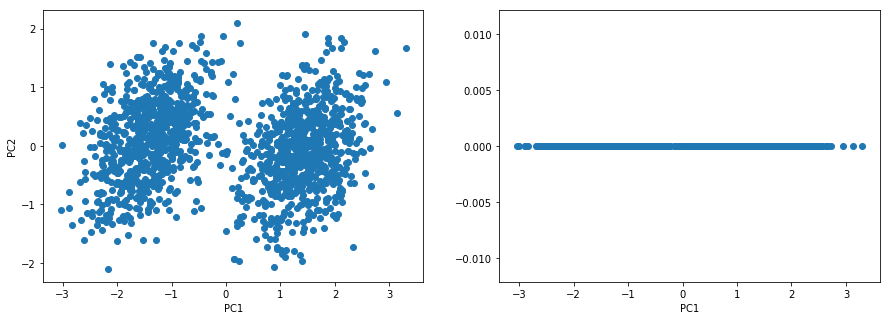

In [4]:
#Ellipse perform dimensionality reduction
eigen_pairs = [(np.abs(eigen_vals_ellipse[i]), eigen_vecs_ellipse[:,i]) for i in range(len(eigen_vals_ellipse))]
eigen_pairs.sort(reverse=True)

w_2d = np.hstack((eigen_pairs[0][1][:, np.newaxis], eigen_pairs[1][1][:, np.newaxis]))
print('Matrix W_2D :\n', w_2d)
X_train_pca_2d = X_train_std_ellipse.dot(w_2d)
cov_mat_2d = np.cov(X_train_pca_2d.T)
print(cov_mat_2d)

fig,ax = plt.subplots(1,2,figsize=(15,5))
ax[0].scatter(X_train_pca_2d[:,0],X_train_pca_2d[:,1])
ax[0].set_xlabel('PC1')
ax[0].set_ylabel('PC2')
                      
w_1d = np.hstack(eigen_pairs[0][1][:,np.newaxis])                      
print('Matrix W_1D :\n', w_1d)
X_train_pca_1d = X_train_std_ellipse.dot(w_1d)
cov_mat_1d = np.cov(X_train_pca_1d.T)
print(cov_mat_1d)
                      
ax[1].scatter(X_train_pca_1d[:], np.zeros(len(X_train_pca_1d[:])),marker='o')
ax[1].set_xlabel('PC1')
plt.show()                                       

Matrix W_2D :
 [[-0.57722416 -0.66056035]
 [-0.5777493  -0.08510587]
 [-0.57707712  0.74593366]]
[[  2.79768426e+00   2.55521643e-16]
 [  2.55521643e-16   1.04064929e-01]]
Matrix W_1D :
 [-0.57722416 -0.5777493  -0.57707712]
2.797684256366527


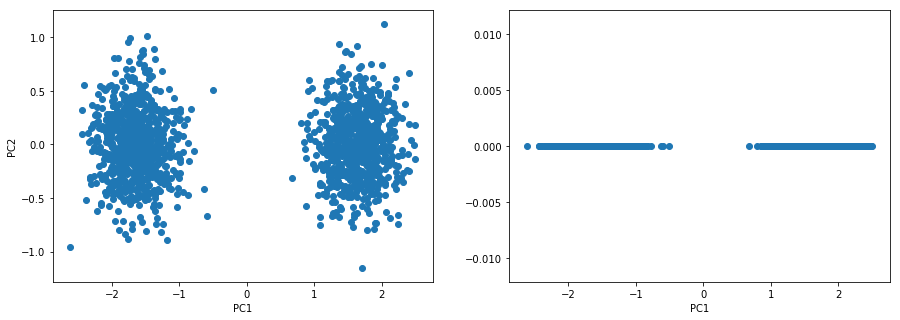

In [5]:
#Sphere perform dimensionality reduction
eigen_pairs = [(np.abs(eigen_vals_sphere[i]), eigen_vecs_sphere[:,i]) for i in range(len(eigen_vals_sphere))]
eigen_pairs.sort(reverse=True)

w_2d = np.hstack((eigen_pairs[0][1][:, np.newaxis], eigen_pairs[1][1][:, np.newaxis]))
print('Matrix W_2D :\n', w_2d)
X_train_pca_2d = X_train_std_sphere.dot(w_2d)
cov_mat_2d = np.cov(X_train_pca_2d.T)
print(cov_mat_2d)

fig,ax = plt.subplots(1,2,figsize=(15,5))
ax[0].scatter(X_train_pca_2d[:,0],X_train_pca_2d[:,1])
ax[0].set_xlabel('PC1')
ax[0].set_ylabel('PC2')
                      
w_1d = np.hstack(eigen_pairs[0][1][:,np.newaxis])                      
print('Matrix W_1D :\n', w_1d)
X_train_pca_1d = X_train_std_sphere.dot(w_1d)
cov_mat_1d = np.cov(X_train_pca_1d.T)
print(cov_mat_1d)
                      
ax[1].scatter(X_train_pca_1d[:], np.zeros(len(X_train_pca_1d[:])),marker='o')
ax[1].set_xlabel('PC1')
plt.show()                                       

Matrix W_2D :
 [[ 0.70366426  0.06901702]
 [ 0.09948685 -0.9950371 ]
 [ 0.70353321  0.07167863]]
[[  1.10034620e+00   1.74921229e-15]
 [  1.74921229e-15   9.99671011e-01]]
Matrix W_1D :
 [ 0.70366426  0.09948685  0.70353321]
1.1003461953900457


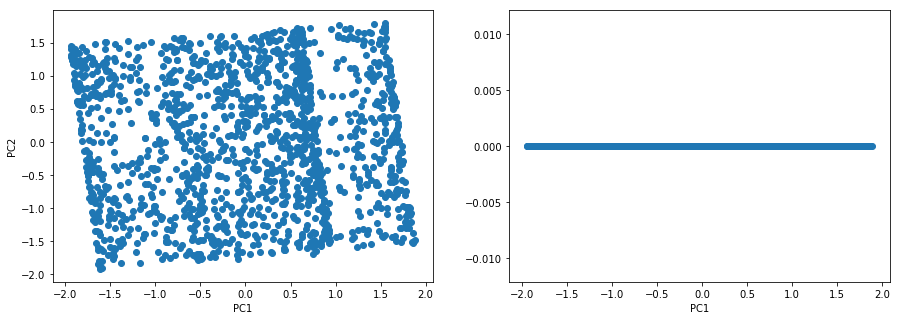

In [6]:
#Swiss Roll perform dimensionality reduction
eigen_pairs = [(np.abs(eigen_vals_swissroll[i]), eigen_vecs_swissroll[:,i]) for i in range(len(eigen_vals_swissroll))]
eigen_pairs.sort(reverse=True)

w_2d = np.hstack((eigen_pairs[0][1][:, np.newaxis], eigen_pairs[1][1][:, np.newaxis]))
print('Matrix W_2D :\n', w_2d)
X_train_pca_2d = X_train_std_swissroll.dot(w_2d)
cov_mat_2d = np.cov(X_train_pca_2d.T)
print(cov_mat_2d)

fig,ax = plt.subplots(1,2,figsize=(15,5))
ax[0].scatter(X_train_pca_2d[:,0],X_train_pca_2d[:,1])
ax[0].set_xlabel('PC1')
ax[0].set_ylabel('PC2')
                      
w_1d = np.hstack(eigen_pairs[0][1][:,np.newaxis])                      
print('Matrix W_1D :\n', w_1d)
X_train_pca_1d = X_train_std_swissroll.dot(w_1d)
cov_mat_1d = np.cov(X_train_pca_1d.T)
print(cov_mat_1d)
                      
ax[1].scatter(X_train_pca_1d[:], np.zeros(len(X_train_pca_1d[:])),marker='o')
ax[1].set_xlabel('PC1')
plt.show()                                       